<a href="https://colab.research.google.com/github/joaovitorcg04/Projeto_de_Redes_Neurais_Artificiais_para_IoT/blob/main/Projeto_de_Redes_Neurais_Artificiais_para_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto de Redes Neurais Artificiais para IoT

---
Este projeto é um classificador de imagens desenvolvido em Python utilizando TensorFlow e a técnica de Transfer Learning. O objetivo é treinar uma rede neural para distinguir com alta acurácia entre imagens de cães e gatos. O modelo utiliza a arquitetura pré-treinada EfficientNetV2B0 como base, adicionando novas camadas no topo para a classificação específica.




In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
import os
import zipfile
import matplotlib.pyplot as plt
import math
import numpy as np

Preparando os Dados

In [28]:

path_to_zip = tf.keras.utils.get_file(
    'cats_and_dogs.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=False
)
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')

base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            label_mode='binary',
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 label_mode='binary',
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Construção e Arquitetura do modelo

In [29]:

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=IMG_SHAPE),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

base_model = tf.keras.applications.EfficientNetV2B0(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilação

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
print("Modelo compilado.")

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 5, 5, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,920,593 (22.59 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

Modelo compilado.


Area de Treinamento

In [31]:
EPOCHS = 30
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.8459 - loss: 0.4136 - val_accuracy: 0.9740 - val_loss: 0.1291
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9593 - loss: 0.1468 - val_accuracy: 0.9800 - val_loss: 0.0819
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9642 - loss: 0.1139 - val_accuracy: 0.9830 - val_loss: 0.0646
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9629 - loss: 0.1054 - val_accuracy: 0.9830 - val_loss: 0.0551
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9706 - loss: 0.0892 - val_accuracy: 0.9860 - val_loss: 0.0489
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9734 - loss: 0.0760 - val_accuracy: 0.9840 - val_loss: 0.0460
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9763 - loss: 0.0762 - val_accuracy: 0.9860 - val_loss: 0.0425
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9742 - loss: 0.0729 - val_accuracy: 0.9870 -

Mostrar o objetivo do treino a máquina

In [32]:

def imagem_content(file_path, trained_model):
    try:
        img = tf.keras.utils.load_img(file_path, target_size=IMG_SIZE)
        img_array = tf.keras.utils.img_to_array(img)
        img_array_preprocessed = preprocess_input(img_array)
        img_batch = tf.expand_dims(img_array_preprocessed, 0)

        prediction = trained_model.predict(img_batch)
        probability = prediction[0][0]

        plt.imshow(img)
        plt.axis('off')

        if probability > 0.5:
            print(f"É um cachorro! (Probabilidade: {probability*100:.1f}%)")
        else:
            probability_cat = 1 - probability
            print(f"É um gato! (Probabilidade: {probability_cat*100:.1f}%)")
    except FileNotFoundError:
        print(f"ERRO: Arquivo não encontrado em '{file_path}'")
    except Exception as e:
        print(f"Não foi possível processar a imagem. Erro: {e}")

Resumo do aprendizado

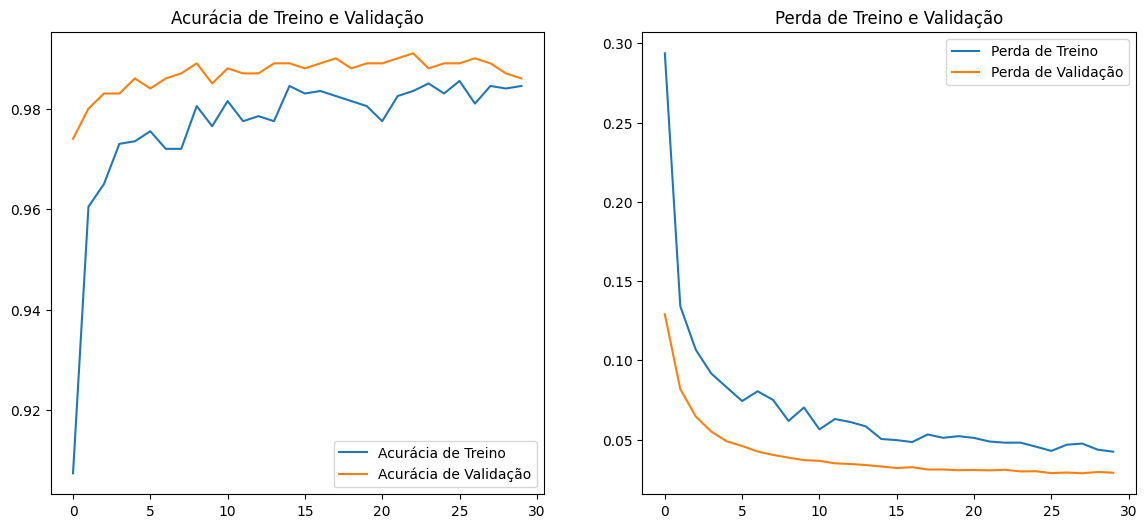



PROCESSO CONCLUÍDO! O modelo está treinado e pronto para ser testado abaixo.


In [33]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

print("\n\nPROCESSO CONCLUÍDO! O modelo está treinado e pronto para ser testado abaixo.")

Bom teste!

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
É um gato! (Probabilidade: 99.9%)


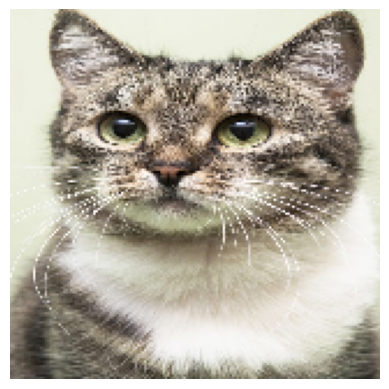

In [34]:
# Lembre-se de fazer o upload da sua imagem para a pasta /content

caminho_imagem = "/content/ex.jpg"  #Copie o caminho da sua imagem e coloque dentro do ""
imagem_content(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
É um cachorro! (Probabilidade: 99.8%)


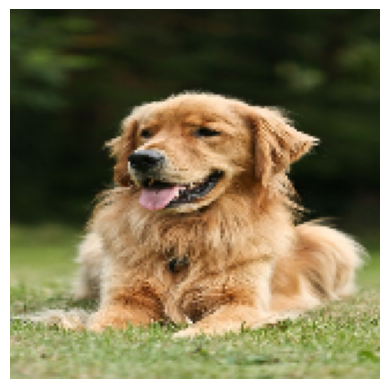

In [35]:
# Lembre-se de fazer o upload da sua imagem para a pasta /content

caminho_imagem = "/content/ex.jpg" #Copie o caminho da sua imagem e coloque dentro do ""
imagem_content(caminho_imagem, model)